# Comic Fiesta Queue Simulation

Team Members: Tan Chong Han, 
Chew Zhi Xin, 
Pang Yu Von

# System Modelling

Assuming that a customer is equally likely to arrive during any timestep, this probability will be denoted using the Greek letter lambda, $\lambda$, or the variable name `lam`.  The value of $\lambda$ probably varies from day to day, so a range of possibilities have to be considered.

Based on the data collected by obvservation, it takes 3 seconds for an attendee to finish ticket validation, on average. But the ticket validation times are highly variable: most attendees take less than 3 seconds, but some take substantially more.  A simple way to model this variability is to assume that when a attendee is validating ticket, they have the same probability of finishing up during each time step.  This probability will be denoted using the Greek letter mu, $\mu$, or the variable name `mu`.

If we choose $\mu=1/3$, the average number of time steps for each ticket validation will be 3 seconds, which is consistent with the data.
*Ticket validation is to check the presence of ticket wristband on the attendee's wrist

In [1]:
try:
    import pint
except ImportError:
    !pip install pint
    import pint
try:
    from modsim import *
except ImportError:
    !pip install modsimpy
    from modsim import *
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# set the random number generator
np.random.seed(7)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import statistics
# If this cell runs successfully, it produces no output.

In [2]:
d = {'Time(s)': [1, 2, 3, 4, 5], 'Probability': [0.06681, 0.24173, 0.38292, 0.24173,0.06681]}
df = pd.DataFrame(data=d)
df

,Time(s),Probability
0,1,0.06681
1,2,0.24173
2,3,0.38292
3,4,0.24173
4,5,0.06681


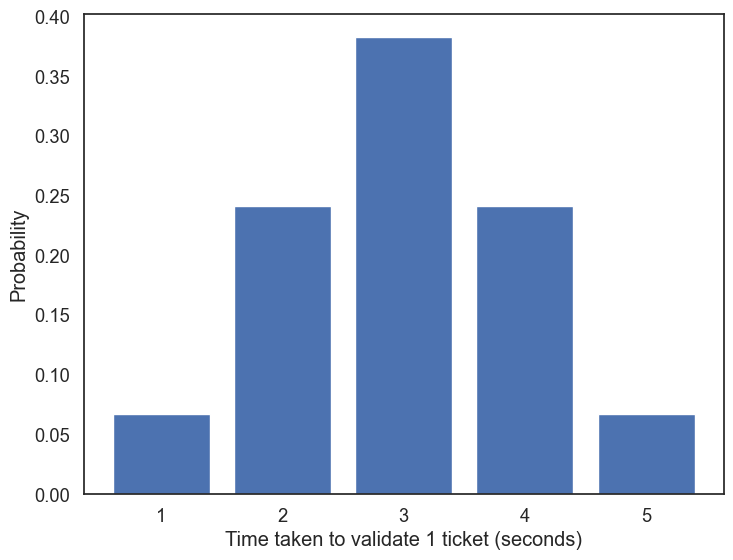

Mean: 3.0


C:\Users\Brandon\AppData\Local\Temp\ipykernel_17792\2802427874.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  mean = sum(times[i] * probs[i] for i in range(len(times)))


In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
times = [1, 2, 3, 4, 5]
probs = [0.06681, 0.24173, 0.38292, 0.24173,0.06681]
ax.bar(times,probs)
ax.set_ylabel('Probability')
ax.set_xlabel('Time taken to validate 1 ticket (seconds)')
plt.show()
# Calculate the mean
mean = sum(times[i] * probs[i] for i in range(len(times)))
print("Mean:", mean)






In [4]:
def attendee100Time():
    attendeeTime = np.random.rand(100,1)
    totalTime = 0
    for i in range(100):
        if attendeeTime[i] < 0.06681:
            attendeeTime[i] = 1
        elif (attendeeTime[i] > 0.06681) & (attendeeTime[i] < 0.30854):
            attendeeTime[i] = 2
        elif (attendeeTime[i] > 0.30854) & (attendeeTime[i] < 0.69146):
            attendeeTime[i] = 3
        elif (attendeeTime[i] > 0.69146) & (attendeeTime[i] < 0.93319):
            attendeeTime[i] = 4
        elif attendeeTime[i] > 0.93319:
            attendeeTime[i] = 5
        totalTime = totalTime + attendeeTime[i]
    return totalTime
print (attendee100Time())

dict = { 'Time':[]
       }
  
df = DataFrame(dict)

for i in range(650):
    df.loc[len(df.index)] = [attendee100Time()] 

display(df['Time'].sort_values())

print(df.mean())
print(df.std())

[309.]


106    [273.0]
150    [274.0]
554    [274.0]
263    [275.0]
380    [276.0]
        ...   
465    [324.0]
411    [324.0]
319    [328.0]
646    [329.0]
395    [334.0]
Name: Time, Length: 650, dtype: object

Time    299.970769
dtype: float64
Time    9.672961
dtype: float64


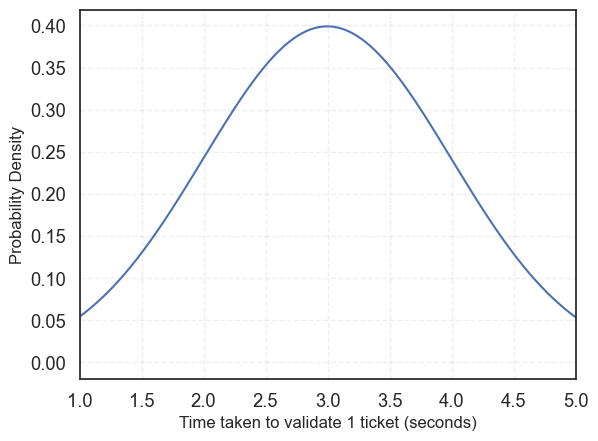

In [5]:
#Generating data frame
x = np.random.normal(3, 1, 65000)
source = {"Genotype": ["CV1"]*65000, "AGW": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(df["AGW"])
df_std = np.std(df["AGW"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["AGW"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["AGW"].sort_values(), pdf)
plt.xlim([1,5])  
plt.xlabel("Time taken to validate 1 ticket (seconds)", size=12)    
plt.ylabel("Probability Density", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [6]:
# Generate a dataset of individual ticket validation times for 100 tickets
individual_times = np.random.normal(3, 1, 100)

# Calculate the total time to validate 100 tickets
total_time = np.sum(individual_times)

# Repeat the above steps many times to create a distribution of total times for 100 tickets

# Calculate the mean of the distribution of total times
mean_total_time = np.mean(total_time)

print("Mean time to validate 100 tickets:", mean_total_time)

Mean time to validate 100 tickets: 301.0521727321626


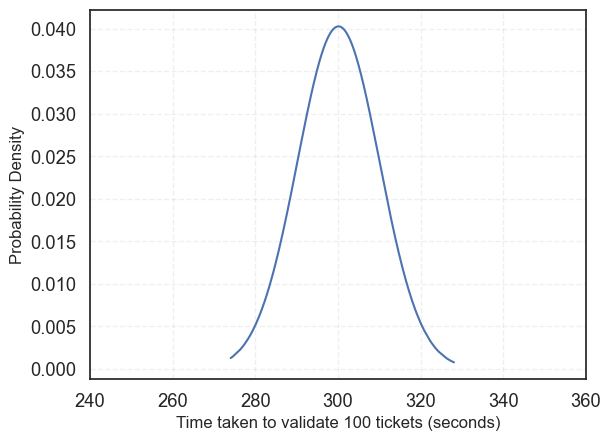

In [7]:
#Generating data frame
x = np.random.normal(300, 10, 650)
source = {"Genotype": ["CV1"]*650, "AGW": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(df["AGW"])
df_std = np.std(df["AGW"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["AGW"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["AGW"].sort_values(), pdf)
plt.xlim([240,360])  
plt.xlabel("Time taken to validate 100 tickets (seconds)", size=12)    
plt.ylabel("Probability Density", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

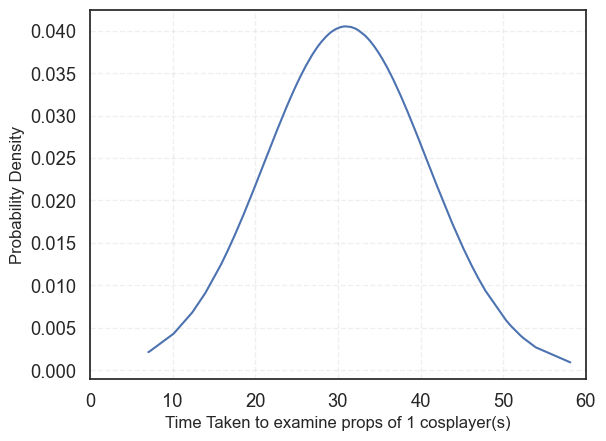

In [8]:
#Generating data frame
x = np.random.normal(30, 10, 130)
source = {"Genotype": ["CV1"]*130, "AGW": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(df["AGW"])
df_std = np.std(df["AGW"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["AGW"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["AGW"].sort_values(), pdf)
plt.xlim([0,60])  
plt.xlabel("Time Taken to examine props of 1 cosplayer(s)", size=12)    
plt.ylabel("Probability Density", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

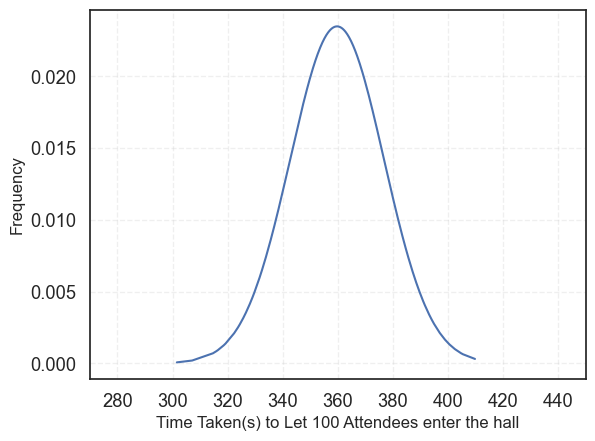

In [9]:
#Generating data frame
x = np.random.normal(360, 17.32, 650)
source = {"Genotype": ["CV1"]*650, "AGW": x}
df = pd.DataFrame(source)

# Calculating mean and Stdev of AGW
df_mean = np.mean(df["AGW"])
df_std = np.std(df["AGW"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["AGW"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["AGW"].sort_values(), pdf)
plt.xlim([270,450])  
plt.xlabel("Time Taken(s) to Let 100 Attendees enter the hall", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

## Current Queue System (1 Queue with only 1 Entrance)

This simulation is meant to reflect the current Comic Fiesta queue system, with only 1 queue lane, 1 entrance, 1 exit, and one ticket validating spot.

Firstly, a function called `make_system` that takes `attendee_number`, `ticket_validation_rate` and `props_examination_rate` as parameters and returns a `System` object with variables `lambda_attendees`, `mu_ticket_validation`, `mu_props_examination`, `duration_seconds`, `arrival_times` and `exit_times` are written. `duration`, which is the number of time steps to simulate is set to 7 hours, expressed in seconds.

In [10]:
def make_old_system(arrival_rate, ticket_validation_rate, props_examination_rate):
    """
    Create a System object for the simulation.

    Parameters:
        arrival_rate (float): The arrival rate (λ) of attendees per minute during peak hours.
        ticket_validation_rate (float): The service rate (µ) for ticket validation per minute.
        props_examination_rate (float): The service rate (µ) for props examination per minute.

    Returns:
        System: A System object with simulation parameters.
    """
    # The duration refers to the time frame of the queue being simulated
    # Duration is set to 7 hours (5 am to 12 pm), expressed in seconds
    duration_seconds = 7 * 60 * 60

    # Create and configure the System object
    system = pd.Series(dtype='float64')  # Explicitly specify dtype as 'float64'
    system['lambda_attendees'] = arrival_rate
    system['mu_ticket_validation'] = ticket_validation_rate
    system['mu_props_examination'] = props_examination_rate
    system['duration_seconds'] = duration_seconds
    system['arrival_times'] = []
    system['exit_times'] = []

    return system

In [11]:
old_interarrival_time = (420*60) / 16250
old_ticket_validation_time = 3
old_props_time = 30

lam = 1 / old_interarrival_time
ticketMu = 1 / old_ticket_validation_time
propsMu = 1 / old_props_time

old_system = make_old_system(lam, ticketMu, propsMu)
old_system

lambda_attendees        0.644841
mu_ticket_validation    0.333333
mu_props_examination    0.033333
duration_seconds         25200.0
arrival_times                 []
exit_times                    []
dtype: object

In order to simulate this scenario with only 1 queue, 1 state variable - `queue_length` is needed to keep track of customers in the queue.

An update function that takes the `queue_length`, `t`, and `system` as parameters and returns `queue_length` as return values is created.

`queue_length`: number of customers in the queue
<br>`t`: time step (no. of minutes elapsed in the simulation)
<br>`system`: `System` object

If a attendee is having his or her ticket validated, `flip` should be used to decide whether they are done. Also, `flip` should be used to decide if a new attendee has arrived.

It should return the number of attendee for the queue at the end of the time step.

In [12]:
import numpy as np

def update_func_single_queue(queue_length, t, system):
    """
    Simulate a single unified queue with separate service rates for ticket validation and props examination.
    
    queue_length: number of customers in the queue
    t: time step (number of seconds elapsed in the simulation)
    system: System object with mu_ticket_validation, mu_props_examination, and lambda_attendees attributes
    """
    # Check if the server for ticket validation is busy and if any customer is done
    if queue_length > 0 and flip(system['mu_ticket_validation']):
        queue_length -= 1
        system['exit_times'].append(t)
    
    # Check if the server for props examination is busy and if any customer is done
    if queue_length > 0 and flip(system['mu_props_examination']):
        queue_length -= 1
        system['exit_times'].append(t)
    
    # Check for customer arrivals
    if flip(system['lambda_attendees']):
        # A customer has arrived and joins the queue
        # Now, we need to check if this customer requires props examination
        if flip(0.02):  # Assuming 2% of attendees need props examination
            # This customer requires props examination
            # You can adjust the props examination time as needed
            props_exam_time = np.random.exponential(1 / system['mu_props_examination'])
            # Add the customer's props examination time to the queue_length
            queue_length += 1
            system['arrival_times'].append(t)
        else:
            # This customer only needs ticket validation
            ticket_validation_time = np.random.exponential(1 / system['mu_ticket_validation'])
            # Add the customer's ticket validation time to the queue_length
            queue_length += 1
            system['arrival_times'].append(t)
    
    return queue_length


In order to test the working of the function, it has been called with passing in `queue_length = 1`, `t=0` and the `System` object created. Different results will be shown if it is run a few times.

In [13]:
update_func_single_queue(1, 0, old_system)

2

Until this stage, the suitable version of `run_simulation` that works with this update function is written to run the simulation. It creates a `TimeSeries` for the results obtained.

In [14]:
def run_old_simulation(system, update_func):
    """Simulate a queueing system with multiple queues.
    
    system: System object
    update_func: function object
    """
    # Initialize the queues
    x1 = 0

    results = pd.DataFrame(columns=['Queue 1'])
    
    for t in range(0, int(system['duration_seconds'])):
        # Update the queues using the update function
        x1 = update_func(x1, t, system)
        results.loc[t] = [x1]

    return results

The simulation can be run with a single value of `lam`. The results are plotted.

In [15]:
results = run_old_simulation(old_system, update_func_single_queue)
print(results)

       Queue 1
0            0
1            1
2            1
3            2
4            1
...        ...
25195     6880
25196     6880
25197     6880
25198     6881
25199     6882

[25200 rows x 1 columns]


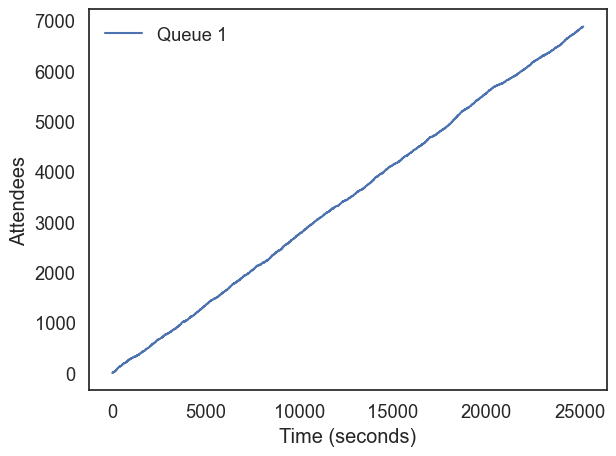

In [16]:
results.plot()
decorate(xlabel='Time (seconds)', ylabel='Attendees')

After the simulation, we can compute the average number of attendees in the system, and the average time attendees spent waiting in the Comic Fiesta queue.  the two numbers are related by Little's Law:

$L = \lambda W$

Where $\lambda$ is the arrival rate.  Here is a function that computes them.

In [17]:
def compute_metrics(results, system):
    """
    Compute average number of attendees in the queue and average waiting time.
    
    results: TimeSeries of queue lengths
    system: System object
    
    returns: Average_Attendees, Average_Waiting_Time
    """
    # Calculate the average number of attendees in the queue (Average_Attendees)
    Average_Attendees = results.mean()
    
    # Calculate the average waiting time (Average_Waiting_Time) in minutes
    # by dividing Average_Attendees by the arrival rate (lambda_attendees)
    Average_Waiting_Time = Average_Attendees / system['lambda_attendees']
    
    return Average_Attendees, Average_Waiting_Time

`compute_metrics` is called with the results from the simulation.

In [18]:

avgLength, avgTime = compute_metrics(results, old_system)

print(compute_metrics(results, old_system))
print("Time in minutes: "+str(avgTime/60))
print("Time in hours: "+str(avgTime/3600))

(Queue 1    3453.390238
dtype: float64, Queue 1    5355.411323
dtype: float64)
Time in minutes: Queue 1    89.256855
dtype: float64
Time in hours: Queue 1    1.487614
dtype: float64


As we can see in the resultant graph plotted, the number of attendees in the queue build up almost linearly over time. The effect of this is attendees that arrive earlier have shorter waiting time in the queue, while the attendees that arrive later have to suffer a longer waiting time in the queue.

A function `get_waiting_time` is created to extract the waiting times from the attendees in the queue that have completed their entry.

In [19]:
def get_old_waiting_time(system):
    waiting_times = []
    
    for i in range(0, len(system['exit_times'])):
        waiting_time = system['exit_times'][i] - system['arrival_times'][i]
        waiting_times.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    return pd.DataFrame(waiting_times)

The extracted waiting times of customers is plotted in a graph over time.

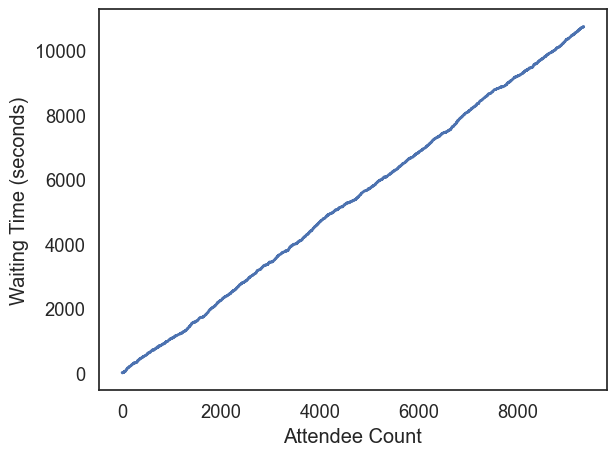

In [20]:
waiting_times = get_old_waiting_time(old_system)
# Convert the DataFrame to a TimeSeries
time_series = TimeSeries(waiting_times['Waiting Time'], index=waiting_times['Attendee Count'])

# Plot the data
plot(time_series)
decorate(xlabel='Attendee Count', ylabel='Waiting Time (seconds)')
plt.show()  # Display the ploty7az

As we can see from the graph, as more and more attendees join the queue, the waiting time becomes much longer as time goes by, also in a linearly fashion. The people that arrive early does not spend as much time in the queue as the people that arrive late, this means that the average wait time in queue is only applicable to the narrow range of attendees that arrive in the attendee count range of around 4000 to 6000, the average wait time will not accurately represent the people in the front of the queue that arrived early nor the back of the queue that came late.

As the graph of the wait times is almost fully linear, we can estimate the rate of change of the waiting time of the customers over time using $M = dy/dx$

In [21]:
import random
pairs = []

for i in range(100):
    # Generate a list of 100 pairs of random numbers
    a = random.randint(0, len(old_system['exit_times']))
    b = random.randint(0, len(old_system['exit_times']))
    if a > b :
        larger = a
        smaller = b
    else :
        larger = b
        smaller = a
    #print(larger)
    #print(smaller)

    # Ensure the smaller number is on the left and the larger number is on the right
    pairs.append((waiting_times["Waiting Time"][larger] - waiting_times["Waiting Time"][smaller]) / (waiting_times["Attendee Count"][larger] - waiting_times["Attendee Count"][smaller]))

The average value of the $M$ is calculated using 100 randomly generated values of $dy / dx$

In [22]:
sumRateOfChange = 0

for i in range (0, len(pairs)):
    sumRateOfChange += pairs[i]

averageRateOfChange = sumRateOfChange/len(pairs)

1.1612517846486687

In order to calculate the throughput of the system, a function called `make_system2` that takes `attendee_number`, `ticket_validation_rate` and `props_examination_rate` as parameters and returns a `System` object with variables `attendee_number`, `mu_ticket_validation`, `mu_props_examination` and `duration_seconds` is written. `duration`, which is the number of time steps to reach 7 hours, expressed in seconds.

In [23]:
def make_throughput_system(attendee_number, ticket_validation_rate, props_examination_rate):
    """
    Create a System object for the simulation.

    Parameters:
        attendee_number (integer): The number of attendees in the entire peak period of the queue.
        ticket_validation_rate (float): The service rate (µ) for ticket validation per minute.
        props_examination_rate (float): The service rate (µ) for props examination per minute.

    Returns:
        System: A System object with simulation parameters.
    """
    # Duration is initialized to 0
    duration_seconds = 0

    # Create and configure the System object
    system = pd.Series(dtype='float64')  # Explicitly specify dtype as 'float64'
    system['attendee_number'] = attendee_number
    system['mu_ticket_validation'] = ticket_validation_rate
    system['mu_props_examination'] = props_examination_rate
    system['duration_seconds'] = duration_seconds

    return system

A different version of the existing system is created, with 16250 number of attendees, service time (ticket validation time) of 3 seconds, and props examination time of 30 seconds

In [24]:
no_of_attendees = 16250
service_time = 3
props_time = 30

ticketMu = 1 / service_time
propsMu = 1 / props_time

old_system2 = make_throughput_system(no_of_attendees, ticketMu, propsMu)
old_system2

attendee_number         16250.000000
mu_ticket_validation        0.333333
mu_props_examination        0.033333
duration_seconds            0.000000
dtype: float64

In order to calculate the throughput with only 1 queue, 1 state variable - `queue_length` is needed to keep track of customers in the queue.

A different update function `update_func_single_queue2` that takes a initialized value of `queue_length`, `t`, and `system` as parameters and returns `queue_length` as return values is created.

`queue_length`: number of customers in the queue
<br>`t`: time step (no. of minutes elapsed in the simulation)
<br>`system`: `System` object

If a attendee is having his or her ticket validated or props examined, `flip` should be used to decide whether they are done.

It should return the number of attendee for the queue at the end of the time step.

In [25]:
def update_func_single_queue2(queue_length, t, system):
    """
    Simulate a single unified queue with separate service rates for ticket validation and props examination.
    
    queue_length: number of customers in the queue
    t: time step (number of seconds elapsed in the simulation)
    system: System object with mu_ticket_validation, mu_props_examination, and lambda_attendees attributes
    """


    if flip(0.02):  # Assuming 2% of attendees need props examination
        # This customer requires props examination
        # Check if the server for props examination is busy and if any customer is done
        if queue_length > 0 and flip(system['mu_props_examination']):
            queue_length -= 1
    else:
        # This customer only needs ticket validation
        # Check if the server for ticket validation is busy and if any customer is done
        if queue_length > 0 and flip(system['mu_ticket_validation']):
            queue_length -= 1
    
    return queue_length

To get the throughput results, a modified version of `run_simulation` that works with this modified update function is written to run the simulation. It returns the time taken in seconds for processing all the attendees in the queue.

In [26]:
def run_throughput_simulation(system, update_func):
    """Simulate a queueing system.
    
    system: System object
    update_func: function object
    """
    t = 0
    x = system['attendee_number']
    
    while x > 0:
        x = update_func(x,t, system)
        t+=1
    print(t)
    return t

The results are expressed in seconds and is converted to minutes and hours.

In [27]:
results_sec = run_throughput_simulation(old_system2, update_func_single_queue2)
results_min = results_sec / 60
results_hr = results_min / 60
print("Seconds: " + str(results_sec))
print("Minutes: " + str(results_min))
print("Hours: " + str(results_hr))

49998
Seconds: 49998
Minutes: 833.3
Hours: 13.888333333333332


## Proposed Queue System 1 (2 Queue with 2 QR Code Gated Entrance, One for Cosplayers, One for Other Attendees)

Our first proposed solution is to separate the queues for the normal attendees with the cosplayers. Considering the cosplayers need to have their props examined, taking up longer time, it might be reasonable to have a separate queue lane reserved exclusively for these people

Firstly, a function called `make_new_system_doubleQ` that takes `attendee_number`, `ticket_validation_rate` and `props_examination_rate` as parameters and returns a `System` object with variables `lambda_attendees`, `mu_ticket_validation`, `mu_props_examination`, `duration_seconds`, `arrival_times` and `exit_times` for both 2 queues and gates are written. `duration`, which is the number of time steps to simulate is set to 7 hours, expressed in seconds.

In [28]:
def make_new_system_doubleQ(arrival_rate, ticket_validation_rate, props_examination_rate):
    """
    Create a System object for the simulation.

    Parameters:
        arrival_rate (float): The arrival rate (λ) of attendees per minute during peak hours.
        ticket_validation_rate (float): The service rate (µ) for ticket validation per minute.
        props_examination_rate (float): The service rate (µ) for props examination per minute.

    Returns:
        System: A System object with simulation parameters.
    """
    # The duration refers to the time frame of the queue being simulated
    # Duration is set to 7 hours (5 am to 12 pm), expressed in seconds
    duration_seconds = 7 * 60 * 60

    # Create and configure the System object
    system = pd.Series(dtype='float64')  # Explicitly specify dtype as 'float64'
    system['lambda_attendees'] = arrival_rate
    system['mu_ticket_validation'] = ticket_validation_rate
    system['mu_props_examination'] = props_examination_rate
    system['duration_seconds'] = duration_seconds
    system['arrival_times_x1'] = []
    system['exit_times_x1'] = []
    system['arrival_times_x2'] = []
    system['exit_times_x2'] = []

    return system

It is assumed that a person would take 5 seconds to manually scan his or her barcode ticket on the automated gate, approximately 2 seconds longer than human visual validation in the old existing system.

In [29]:
new_interarrival_time = (420*60) / 16250
new_tiket_validation_time = 5
new_props_time = 30

lam = 1 / new_interarrival_time
ticketMu = 1 / new_tiket_validation_time
propsMu = 1 / new_props_time

new_system1 = make_new_system_doubleQ(lam, ticketMu, propsMu)
new_system1

lambda_attendees        0.644841
mu_ticket_validation         0.2
mu_props_examination    0.033333
duration_seconds         25200.0
arrival_times_x1              []
exit_times_x1                 []
arrival_times_x2              []
exit_times_x2                 []
dtype: object

In order to simulate this scenario with two separate queues, 2 state variables (x1, x2) are needed to keep track of customers in each queue.

An update function that takes `x1`, `x2`, `t`, and `system` as parameters and returns `x1` and `x2` as return values is created.

`x1`: number of attendees in queue 1
<br>`x2`: number of attendees in queue 2
<br>`t`: time step (no. of minutes elapsed in the simulation)
<br>`system`: `System` object

If a attendees is validating his or her ticket or examining his or her props, `flip` should be used to decide whether they are done. Also, `flip` should be used to decide if a new attendee has arrived.

It should return the number of attendees for each queue at the end of the time step.

When an attendee arrives, the attendee be separated to their designated queue lane based on whether they are a cosplayer or not.

In [30]:
def update_func_double_queue(x1, x2, t, system):
    """Simulate 3 queues with one server each.
    
    x1: number of customers in queue 1
    x2: number of customers in queue 2
    t: time step
    system: System object
    """
    
    queue_lengths = [x1, x2]
    
    # if the first server is busy, check if it's done
    if queue_lengths[0] > 0 and flip(system['mu_ticket_validation']):
        queue_lengths[0] -= 1
        system['exit_times_x1'].append(t)
        
    if queue_lengths[1] > 0 and flip(system['mu_ticket_validation']):
        queue_lengths[1] -= 1
        system['exit_times_x2'].append(t)
            
    # if the second server is busy, check if it's done
    if queue_lengths[1] > 0 and flip(system['mu_props_examination']):
        queue_lengths[1] -= 1
        system['exit_times_x2'].append(t)
    
    # check for an arrival
    if flip(system['lambda_attendees']):
        # An attendee has arrived and joins the queue
        if flip(0.1):
            # Now, we need to check if this attendee is a cosplayer
            if flip(0.2):  # Assuming 20% of cosplayers need props examination
                # This cosplayer requires props examination
                props_exam_time = np.random.exponential(1 / system['mu_props_examination'])
            else:
                ticket_validation_time = np.random.exponential(1 / system['mu_ticket_validation'])
            # Add the attendee's props examination time to the queue_length
            queue_lengths[1] += 1
            system['arrival_times_x2'].append(t)
        else:
            # This attendee only needs ticket validation
            ticket_validation_time = np.random.exponential(1 / system['mu_ticket_validation'])
            # Add the attendee's ticket validation time to the queue_length
            queue_lengths[0] += 1
            system['arrival_times_x1'].append(t)

            
    return queue_lengths

A modified version of `run_simulation` called `run_simulation_new1` that works with this updated function for the improved is written to run the simulation. It creates a dataframe for the results obtained.

In [31]:
def run_simulation_new1(system, update_func):
    """Simulate a queueing system with multiple queues.
    
    system: System object
    update_func: function object
    """
    # Initialize the queues
    x1, x2, = 0, 0

    results = pd.DataFrame(columns=['Queue 1', 'Queue 2'])
    
    for t in range(0, int(system['duration_seconds'])):
        # Update the queues using the update function
        x1, x2, = update_func(x1, x2, t, system)
        results.loc[t] = [x1, x2]

    return results

In [32]:
new_results1 = run_simulation_new1(new_system1, update_func_double_queue)

,Queue 1,Queue 2
0,1,0
1,2,0
2,2,0
3,3,0
4,4,0
...,...,...
25195,9658,1
25196,9659,1
25197,9659,1
25198,9659,0


The results is then plotted in a graph of queue length over time for all 2 queues.

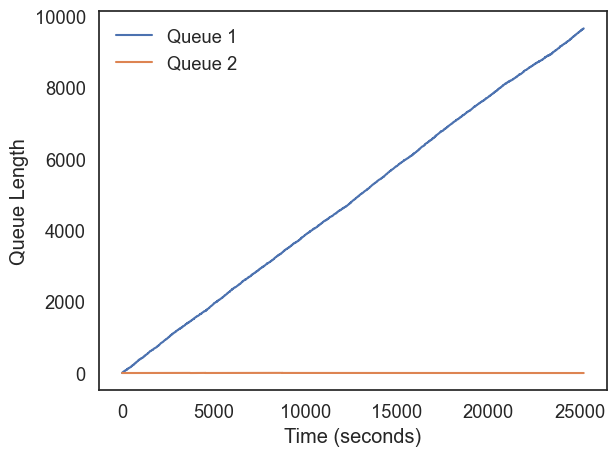

In [33]:
new_results1.plot()
decorate(xlabel='Time (seconds)', ylabel='Queue Length')

In [34]:
print(len(new_system1['arrival_times_x2']))

1610


The average queue length and the average wait time for each queue is then calculated.

In [35]:
compute_metrics(new_results1, new_system1)

(Queue 1    4863.723611
 Queue 2       0.370040
 dtype: float64,
 Queue 1    7542.512923
 Queue 2       0.573846
 dtype: float64)

As we can clearly see, the effects of the lengthened ticket validation time resulted in a much longer waiting time for the queue, far worse than our existing queue system. However, the separate queue for cosplayers only had barely any queue present, and almost 0 average queue lengthh and waiting time, this shows that we may be heading towards the right direction in solving this problem

A new `new_get_waiting_time` function is made to return the individual waiting times for each of the queue in a similar way as the `get_waiting_time`. It takes in a system parameter and returns 3 dataframes.

In [36]:
def new_get_waiting_time1(system):
    waiting_times_x1 = []
    waiting_times_x2 = []
    
    for i in range(0, len(system['exit_times_x1'])):
        waiting_time = system['exit_times_x1'][i] - system['arrival_times_x1'][i]
        waiting_times_x1.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    for i in range(0, len(system['exit_times_x2'])):
        waiting_time = system['exit_times_x2'][i] - system['arrival_times_x2'][i]
        waiting_times_x2.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    return pd.DataFrame(waiting_times_x1), pd.DataFrame(waiting_times_x2)

In [37]:
new_waiting_time1_x1, new_waiting_time1_x2 = new_get_waiting_time1(new_system1)

The results of the waiting times over the number the attendees calculated is plotted

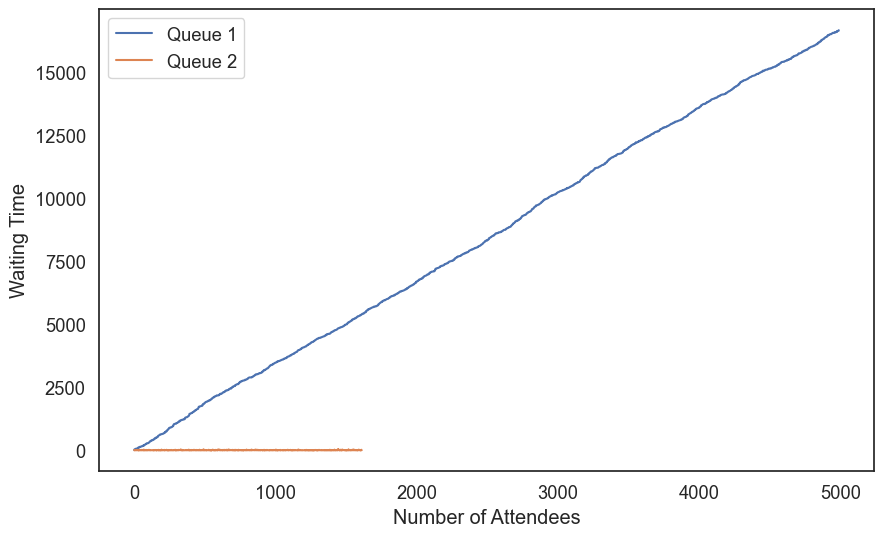

In [38]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot waiting times for x1, x2
plt.plot(new_waiting_time1_x1['Attendee Count'], new_waiting_time1_x1['Waiting Time'], label='Queue 1')
plt.plot(new_waiting_time1_x2['Attendee Count'], new_waiting_time1_x2['Waiting Time'], label='Queue 2')

# Add labels and a legend
plt.xlabel('Number of Attendees')
plt.ylabel('Waiting Time')
plt.legend()

# Show the plot
plt.show()


A throughput system is made to calculate the throughput of the new system.

In [39]:
no_of_attendees = 16250
ticket_validation_time = 5
props_time = 30

ticketMu = 1 / ticket_validation_time
propsMu = 1 / props_time

new_throughput_system1 = make_throughput_system(no_of_attendees, ticketMu, propsMu)
new_throughput_system1

attendee_number         16250.000000
mu_ticket_validation        0.200000
mu_props_examination        0.033333
duration_seconds            0.000000
dtype: float64

A different update function is made, `update_func_double_queue2` to meet the changes in the queue structure of the new system, having 2 queues with 2 entrances.

In [40]:
def update_func_double_queue2(queue_length, t, system):
        if flip(0.02):  # Assuming 2% of attendees need props examination
            # This customer requires props examination
            # Check if the server for props examination is busy and if any customer is done
            if queue_length > 0 and flip(system['mu_props_examination']):
                queue_length -= 1
        # This customer only needs ticket validation
        # Check if the server for ticket validation is busy and if any customer is done
        if queue_length > 0 and flip(system['mu_ticket_validation']):
                queue_length -= 1
        return queue_length

`run_throughput_simulation` function is used to calculate the throughput of the new system

In [41]:
print(new_throughput_system1['attendee_number'])
new_throughput_results1_sec = run_throughput_simulation(new_throughput_system1, update_func_double_queue2)
new_throughput_results1_min = new_throughput_results1_sec / 60
new_throughput_results1_hr = new_throughput_results1_min / 60
print("Seconds: " + str(new_throughput_results1_sec))
print("Minutes: " + str(new_throughput_results1_min))
print("Hours: " + str(new_throughput_results1_hr))

16250.0
80888
Seconds: 80888
Minutes: 1348.1333333333334
Hours: 22.46888888888889


The result of this first proposed queue system is far from optimal, as it expressed a worse results than our original queue system, showing the unfeasibility and inefficiency of this first proposal, as the queue lane for normal attendees ended up being much more congested than before, and the cosplayer exclusive queue lane being underutilized. 
It provided valuable insights and directional guidance to steer our simulation towards a better direction in the hopes of solving this queue problem.

Our next proposed solution system would be to address the crowd build-up in the attendees only queue lane, and figured that improvements will be seen if more queue lanes are allocated for the attendees, hence we decided to simulate 2 queue lanes for attendees, and 1 queue lane for cosplayers.

## Proposed Queue System 2 (3 Queue with 3 QR Code Gated Entrance, One for Cosplayers, Two for Other Attendees)

Firstly, a function called `make_new_system_tripleQ` that takes `attendee_number`, `ticket_validation_rate` and `props_examination_rate` as parameters and returns a `System` object with variables `lambda_attendees`, `mu_ticket_validation`, `mu_props_examination`, `duration_seconds`, `arrival_times` and `exit_times` for all 3 queues and gates are written. `duration`, which is the number of time steps to simulate is set to 7 hours, expressed in seconds.

In [42]:
def make_new_system_tripleQ(arrival_rate, ticket_validation_rate, props_examination_rate):
    """
    Create a System object for the simulation.

    Parameters:
        arrival_rate (float): The arrival rate (λ) of attendees per minute during peak hours.
        ticket_validation_rate (float): The service rate (µ) for ticket validation per minute.
        props_examination_rate (float): The service rate (µ) for props examination per minute.

    Returns:
        System: A System object with simulation parameters.
    """
    # The duration refers to the time frame of the queue being simulated
    # Duration is set to 7 hours (5 am to 12 pm), expressed in seconds
    duration_seconds = 7 * 60 * 60

    # Create and configure the System object
    system = pd.Series(dtype='float64')  # Explicitly specify dtype as 'float64'
    system['lambda_attendees'] = arrival_rate
    system['mu_ticket_validation'] = ticket_validation_rate
    system['mu_props_examination'] = props_examination_rate
    system['duration_seconds'] = duration_seconds
    system['arrival_times_x1'] = []
    system['exit_times_x1'] = []
    system['arrival_times_x2'] = []
    system['exit_times_x2'] = []
    system['arrival_times_x3'] = []
    system['exit_times_x3'] = []

    return system

In [43]:
new_interarrival_time = (420*60) / 16250
new_tiket_validation_time = 5
new_props_time = 30

lam = 1 / new_interarrival_time
ticketMu = 1 / new_tiket_validation_time
propsMu = 1 / new_props_time

new_system2 = make_new_system_tripleQ(lam, ticketMu, propsMu)
new_system2

lambda_attendees        0.644841
mu_ticket_validation         0.2
mu_props_examination    0.033333
duration_seconds         25200.0
arrival_times_x1              []
exit_times_x1                 []
arrival_times_x2              []
exit_times_x2                 []
arrival_times_x3              []
exit_times_x3                 []
dtype: object

In order to simulate this scenario with three separate queues, 3 state variables (x1, x2, x3) are needed to keep track of customers in each queue.

An update function that takes `x1`, `x2`, `x3`, `t`, and `system` as parameters and returns `x1`, `x2`, and `x3` as return values is created.

`x1`: number of attendees in queue 1
<br>`x2`: number of attendees in queue 2
<br>`x3`: number of attendees in queue 3
<br>`t`: time step (no. of minutes elapsed in the simulation)
<br>`system`: `System` object

If a attendees is validating his or her ticket or examining his or her props, `flip` should be used to decide whether they are done. Also, `flip` should be used to decide if a new attendee has arrived.

It should return the number of attendees for each queue at the end of the time step.

When an attendee arrives, the attendee be separated to their designated queue lane based on whether they are a cosplayer or not.

In [44]:
def update_func_duosingle_queue(x1, x2, x3, t, system):
    """Simulate 3 queues with one server each.
    
    x1: number of customers in queue 1
    x2: number of customers in queue 2
    x3: number of customers in queue 3
    t: time step
    system: System object
    """
    
    queue_lengths = [x1, x2, x3]

    
    # if the first server is busy, check if it's done
    if queue_lengths[0] > 0 and flip(system['mu_ticket_validation']):
        queue_lengths[0] -= 1
        system['exit_times_x1'].append(t)
            
    # if the second server is busy, check if it's done
    if queue_lengths[1] > 0 and flip(system['mu_ticket_validation']):
        queue_lengths[1] -= 1
        system['exit_times_x2'].append(t)
            
    # if the third server is busy, check if it's done
    if queue_lengths[2] > 0 and flip(system['mu_ticket_validation']):
        queue_lengths[2] -= 1
        system['exit_times_x3'].append(t)
            
    # if the third server is busy, check if it's done
    if queue_lengths[2] > 0 and flip(system['mu_props_examination']):
        queue_lengths[2] -= 1
        system['exit_times_x3'].append(t)
    
    # check for an arrival
    if flip(system['lambda_attendees']):
        # A customer has arrived and joins the queue
        if flip(0.1):
            # Now, we need to check if this attendee is a cosplayer
            # Add the attendee's props examination time to the queue_length
            if flip(0.2):  # Assuming 20% of cosplayers need props examination
                # This cosplayer requires props examination
                props_exam_time = np.random.exponential(1 / system['mu_props_examination'])
                queue_lengths[2] += 1
                system['arrival_times_x3'].append(t)
            else:
                ticket_validation_time = np.random.exponential(1 / system['mu_ticket_validation'])
                queue_lengths[2] += 1
                system['arrival_times_x3'].append(t)
        else:
            # This customer only needs ticket validation
            ticket_validation_time = np.random.exponential(1 / system['mu_ticket_validation'])
            # Add the customer's ticket validation time to the queue_length
            # join whatever queue that is shorter
            if x1 < x2:
                queue_lengths[0]+=1
                system['arrival_times_x1'].append(t)
            else:
                queue_lengths[1]+=1
                system['arrival_times_x2'].append(t)

            
    return queue_lengths


A modified version of `run_simulation` called `run_simulation_tripleQ` that works with this updated function for the improved is written to run the simulation. It creates a dataframe for the results obtained.

In [45]:
def run_simulation_tripleQ(system, update_func):
    """Simulate a queueing system with multiple queues.
    
    system: System object
    update_func: function object
    """
    # Initialize the queues
    x1, x2, x3, = 0, 0, 0

    results = pd.DataFrame(columns=['Queue 1', 'Queue 2', 'Queue 3'])
    
    for t in range(0, int(system['duration_seconds'])):
        # Update the queues using the update function
        x1, x2, x3 = update_func(x1, x2, x3, t, system)
        results.loc[t] = [x1, x2, x3]

    return results

In [46]:
new_results2 = run_simulation_tripleQ(new_system2, update_func_duosingle_queue)

,Queue 1,Queue 2,Queue 3
0,0,0,0
1,0,0,1
2,0,0,2
3,0,1,2
4,1,1,2
...,...,...,...
25195,2223,2223,1
25196,2223,2224,1
25197,2223,2224,2
25198,2224,2224,2


The results is then plotted in a graph of queue length over time for all 3 queues.

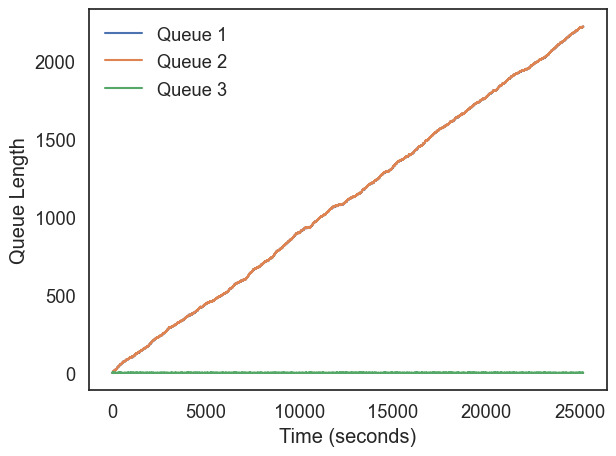

In [47]:
new_results2.plot()
decorate(xlabel='Time (seconds)', ylabel='Queue Length')

The average queue length and the average wait time for each queue is then calculated.

In [48]:
compute_metrics(new_results2, new_system2)

(Queue 1    1115.381349
 Queue 2    1115.886548
 Queue 3       0.393770
 dtype: float64,
 Queue 1    1729.699077
 Queue 2    1730.482523
 Queue 3       0.610646
 dtype: float64)

A new `new_get_waiting_time` function is made to return the individual waiting times for each of the 3 queues in a similar way as the `get_waiting_time`. It takes in a system parameter and returns 3 dataframes.

In [49]:
def new_get_waiting_time_tripleQ(system):
    waiting_times_x1 = []
    waiting_times_x2 = []
    waiting_times_x3 = []
    
    for i in range(0, len(system['exit_times_x1'])):
        waiting_time = system['exit_times_x1'][i] - system['arrival_times_x1'][i]
        waiting_times_x1.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    for i in range(0, len(system['exit_times_x2'])):
        waiting_time = system['exit_times_x2'][i] - system['arrival_times_x2'][i]
        waiting_times_x2.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    for i in range(0, len(system['exit_times_x3'])):
        waiting_time = system['exit_times_x3'][i] - system['arrival_times_x3'][i]
        waiting_times_x3.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    return pd.DataFrame(waiting_times_x1), pd.DataFrame(waiting_times_x2), pd.DataFrame(waiting_times_x3)

In [50]:
new_waiting_time2_x1, new_waiting_time2_x2, new_waiting_time2_x3 = new_get_waiting_time_tripleQ(new_system2)

The results of the waiting times over the number the attendees calculated is plotted

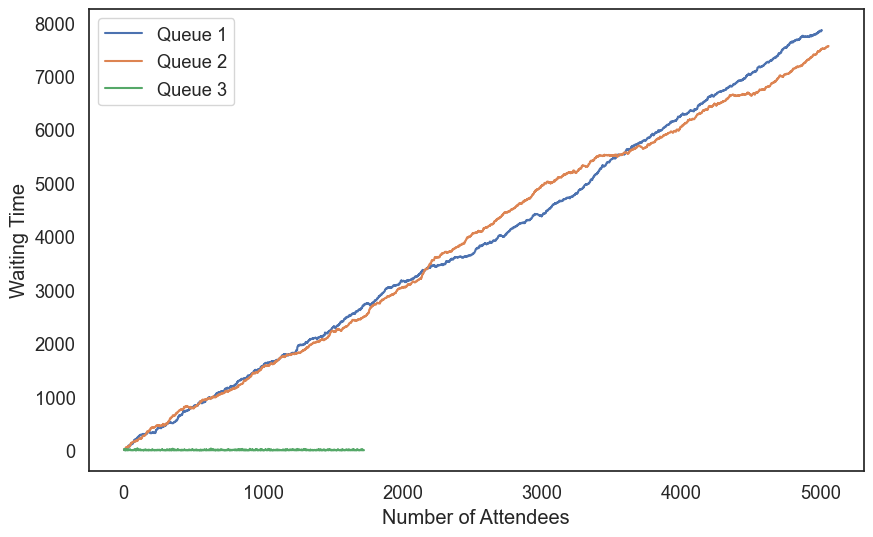

In [51]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot waiting times for x1, x2, and x3
plt.plot(new_waiting_time2_x1['Attendee Count'], new_waiting_time2_x1['Waiting Time'], label='Queue 1')
plt.plot(new_waiting_time2_x2['Attendee Count'], new_waiting_time2_x2['Waiting Time'], label='Queue 2')
plt.plot(new_waiting_time2_x3['Attendee Count'], new_waiting_time2_x3['Waiting Time'], label='Queue 3')
# Add labels and a legend
plt.xlabel('Number of Attendees')
plt.ylabel('Waiting Time')
plt.legend()

# Show the plot
plt.show()


A throughput system is made to calculate the throughput of the new improved system.

In [52]:
no_of_attendees = 16250
ticket_validation_time = 5
props_time = 30

ticketMu = 1 / ticket_validation_time
propsMu = 1 / props_time

new_throughput_system2 = make_throughput_system(no_of_attendees, ticketMu, propsMu)
new_throughput_system2

attendee_number         16250.000000
mu_ticket_validation        0.200000
mu_props_examination        0.033333
duration_seconds            0.000000
dtype: float64

A different update function is made, `update_func_duosingle_queue2` to meet the changes in the queue structure of the new system, having 3 queues with 3 entrances.

In [53]:
def update_func_duosingle_queue2(queue_length_1, queue_length_2, t, system):
    """
    Simulate a single unified queue with separate service rates for ticket validation and props examination.
    
    queue_length: number of customers in the queue
    t: time step (number of seconds elapsed in the simulation)
    system: System object with mu_ticket_validation, mu_props_examination, and lambda_attendees attributes
    """
    
    for i in range (0, 2):
            # This customer only needs ticket validation
            # Check if the server for ticket validation is busy and if any customer is done
            if queue_length_1 > 0 and flip(system['mu_ticket_validation']):
                queue_length_1 -= 1
                
    if queue_length_2 > 0:
        if flip(0.2) and flip(system['mu_props_examination']):
            queue_length_2 -= 1
        elif flip(system['mu_ticket_validation']):
            queue_length_2 -= 1
    
    return queue_length_1, queue_length_2

A `run_throughput_simulation2` function is written to calculate the throughput of the new system, it takes in a system and an update function as a parameter and returns a time value `t` that represents the time taken to process 16,250 attendees divided into attendees (0.9 multiplier) and cosplayers (0.1 multiplier) in each of the queue.

In [54]:
def run_throughput_simulation2(system, update_func):
    """Simulate a queueing system.
    
    system: System object
    update_func: function object
    """
    t = 0
    x1 = system['attendee_number'] * 0.9
    x2 = system['attendee_number'] * 0.1
    
    while (x1+x2) > 0:
        x1, x2 = update_func(x1, x2, t, system)
        t+=1
    print(t)
    return t

In [55]:
print(new_throughput_system2['attendee_number'])
new_throughput_results2_sec = run_throughput_simulation2(new_throughput_system2, update_func_duosingle_queue2)
new_throughput_results2_min = new_throughput_results2_sec / 60
new_throughput_results2_hr = new_throughput_results2_min / 60
print("Seconds: " + str(new_throughput_results2_sec))
print("Minutes: " + str(new_throughput_results2_min))
print("Hours: " + str(new_throughput_results2_hr))

16250.0
36269
Seconds: 36269
Minutes: 604.4833333333333
Hours: 10.074722222222222


We are seeing an improved result, with an average queue length of around 1121 people, average queue time of around 30 minutes, and throughput of around 10 hours, it is a vast improvement compared to the original system.
However, it is identified that the crowd buildup in the 3 queue lanes are unequally distributed, particularly the cosplayer exclusive queue lane showing severe underutlilization and has more potential utilization spaces that were left unused, which is a waste.

The next proposed solution would be to address this underutilization of the cosplayer exclusive queue lane, and just allow all the 3 queue lanes to be used indiscriminately by all attendees including cosplayers.

## Proposed Queue System 3 (3 Queue with 3 QR Code Gated Entrance Indiscriminately)

The function `make_new_system_tripleQ` is reused to create another `System` object with variables `lambda_attendees`, `mu_ticket_validation`, `mu_props_examination`, `duration_seconds`, `arrival_times` and `exit_times` for all 3 queues and gates ars written. `duration`, which is the number of time steps to simulate is set to 7 hours, expressed in seconds.

In [56]:
new_interarrival_time = (420*60) / 16250
new_tiket_validation_time = 5
new_props_time = 30

lam = 1 / new_interarrival_time
ticketMu = 1 / new_tiket_validation_time
propsMu = 1 / new_props_time

new_system3 = make_new_system_tripleQ(lam, ticketMu, propsMu)
new_system3

lambda_attendees        0.644841
mu_ticket_validation         0.2
mu_props_examination    0.033333
duration_seconds         25200.0
arrival_times_x1              []
exit_times_x1                 []
arrival_times_x2              []
exit_times_x2                 []
arrival_times_x3              []
exit_times_x3                 []
dtype: object

In order to simulate this scenario with three separate queues, 3 state variables (x1, x2, x3) are needed to keep track of customers in each queue.

An update function that takes `x1`, `x2`, `x3`, `t`, and `system` as parameters and returns `x1`, `x2`, and `x3` as return values is created.

`x1`: number of attendees in queue 1
<br>`x2`: number of attendees in queue 2
<br>`x3`: number of attendees in queue 3
<br>`t`: time step (no. of minutes elapsed in the simulation)
<br>`system`: `System` object

If a attendees is validating his or her ticket or examining his or her props, `flip` should be used to decide whether they are done. Also, `flip` should be used to decide if a new attendee has arrived.

It should return the number of attendees for each queue at the end of the time step.

When an attendee arrives, the attendee will indiscriminately join the shortest queue.

In [57]:
def update_func_triple_queue(x1, x2, x3, t, system):
    """Simulate 3 queues with one server each.
    
    x1: number of customers in queue 1
    x2: number of customers in queue 2
    x3: number of customers in queue 3
    t: time step
    system: System object
    """
    
    queue_lengths = [x1, x2, x3]
    
    shortest_queue = queue_lengths.index(min(queue_lengths))
    
    # if the first server is busy, check if it's done
    if queue_lengths[0] > 0 and flip(system['mu_ticket_validation']):
        queue_lengths[0] -= 1
        system['exit_times_x1'].append(t)
            
    # if the second server is busy, check if it's done
    if queue_lengths[1] > 0 and flip(system['mu_ticket_validation']):
        queue_lengths[1] -= 1
        system['exit_times_x2'].append(t)
            
    # if the third server is busy, check if it's done
    if queue_lengths[2] > 0 and flip(system['mu_ticket_validation']):
        queue_lengths[2] -= 1
        system['exit_times_x3'].append(t)
        
    # if the first server is busy, check if it's done
    if queue_lengths[0] > 0 and flip(system['mu_props_examination']):
        queue_lengths[0] -= 1
        system['exit_times_x1'].append(t)
            
    # if the second server is busy, check if it's done
    if queue_lengths[1] > 0 and flip(system['mu_props_examination']):
        queue_lengths[1] -= 1
        system['exit_times_x2'].append(t)
            
    # if the third server is busy, check if it's done
    if queue_lengths[2] > 0 and flip(system['mu_props_examination']):
        queue_lengths[2] -= 1
        system['exit_times_x3'].append(t)
    
    # check for an arrival
    if flip(system['lambda_attendees']):
        # join whatever queue that is shorter
        # A customer has arrived and joins the queue
        # Now, we need to check if this customer requires props examination
        if flip(0.02):  # Assuming 2% of attendees need props examination
            # This customer requires props examination
            # You can adjust the props examination time as needed
            props_exam_time = np.random.exponential(1 / system['mu_props_examination'])
            # Add the customer's props examination time to the queue_length
            queue_lengths[shortest_queue] += 1
            if shortest_queue == 0:
                system['arrival_times_x1'].append(t)
            elif shortest_queue == 1:
                system['arrival_times_x2'].append(t)
            elif shortest_queue == 2:
                system['arrival_times_x3'].append(t)
        else:
            # This customer only needs ticket validation
            ticket_validation_time = np.random.exponential(1 / system['mu_ticket_validation'])
            # Add the customer's ticket validation time to the queue_length
            queue_lengths[shortest_queue] += 1
            if shortest_queue == 0:
                system['arrival_times_x1'].append(t)
            elif shortest_queue == 1:
                system['arrival_times_x2'].append(t)
            elif shortest_queue == 2:
                system['arrival_times_x3'].append(t)

            
    return queue_lengths


`run_simulation_tripleQ` is reused to run the simulation for the new 3rd version of our proposed system.

In [58]:
def run_simulation_new3(system, update_func):
    """Simulate a queueing system with multiple queues.
    
    system: System object
    update_func: function object
    """
    # Initialize the queues
    x1, x2, x3, = 0, 0, 0

    results = pd.DataFrame(columns=['Queue 1', 'Queue 2', 'Queue 3'])
    
    for t in range(0, int(system['duration_seconds'])):
        # Update the queues using the update function
        x1, x2, x3 = update_func(x1, x2, x3, t, system)
        results.loc[t] = [x1, x2, x3]

    return results

In [59]:
new_results3 = run_simulation_tripleQ(new_system3, update_func_triple_queue)

,Queue 1,Queue 2,Queue 3
0,1,0,0
1,1,1,0
2,1,1,0
3,0,1,1
4,0,1,1
...,...,...,...
25195,0,1,1
25196,1,0,1
25197,1,1,0
25198,1,1,0


The results is then plotted in a graph of queue length over time for all 3 queues.

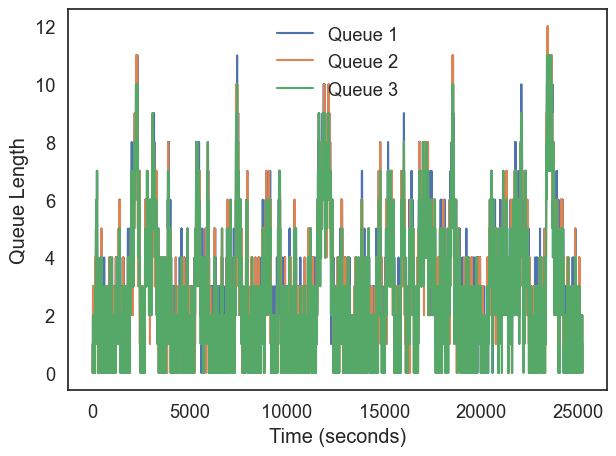

In [60]:
new_results3.plot()
decorate(xlabel='Time (seconds)', ylabel='Queue Length')

The average queue length and the average wait time for each queue is then calculated.

In [61]:
compute_metrics(new_results3, new_system3)

(Queue 1    3.384921
 Queue 2    3.072024
 Queue 3    2.770159
 dtype: float64,
 Queue 1    5.249231
 Queue 2    4.764000
 Queue 3    4.295877
 dtype: float64)

A new `new_get_waiting_time` function is made to return the individual waiting times for each of the queue in a similar way as the `get_waiting_time`. It takes in a system parameter and returns 3 dataframes.

In [62]:
def new_get_waiting_time3(system):
    waiting_times_x1 = []
    waiting_times_x2 = []
    waiting_times_x3 = []
    
    for i in range(0, len(system['exit_times_x1'])):
        waiting_time = system['exit_times_x1'][i] - system['arrival_times_x1'][i]
        waiting_times_x1.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    for i in range(0, len(system['exit_times_x2'])):
        waiting_time = system['exit_times_x2'][i] - system['arrival_times_x2'][i]
        waiting_times_x2.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    for i in range(0, len(system['exit_times_x3'])):
        waiting_time = system['exit_times_x3'][i] - system['arrival_times_x3'][i]
        waiting_times_x3.append({'Attendee Count': i + 1, 'Waiting Time': waiting_time})
        
    return pd.DataFrame(waiting_times_x1), pd.DataFrame(waiting_times_x2), pd.DataFrame(waiting_times_x3)

In [63]:
new_waiting_time_x1, new_waiting_time_x2, new_waiting_time_x3 = new_get_waiting_time_tripleQ(new_system3)

The results of the waiting times over the number the attendees calculated is plotted

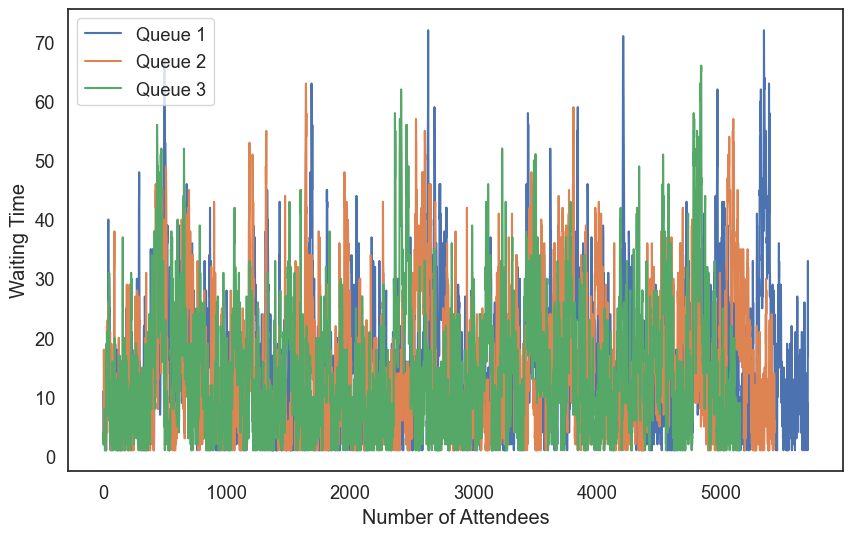

In [64]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot waiting times for x1, x2, and x3
plt.plot(new_waiting_time_x1['Attendee Count'], new_waiting_time_x1['Waiting Time'], label='Queue 1')
plt.plot(new_waiting_time_x2['Attendee Count'], new_waiting_time_x2['Waiting Time'], label='Queue 2')
plt.plot(new_waiting_time_x3['Attendee Count'], new_waiting_time_x3['Waiting Time'], label='Queue 3')

# Add labels and a legend
plt.xlabel('Number of Attendees')
plt.ylabel('Waiting Time')
plt.legend()

# Show the plot
plt.show()


A throughput system is made to calculate the throughput of the new improved system.

In [65]:
no_of_attendees = 16250
service_time = 5
props_time = 30

ticketMu = 1 / service_time
propsMu = 1 / props_time

new_throughput_system3 = make_throughput_system(no_of_attendees, ticketMu, propsMu)
new_throughput_system3

attendee_number         16250.000000
mu_ticket_validation        0.200000
mu_props_examination        0.033333
duration_seconds            0.000000
dtype: float64

A different update function is made, `update_func_triple_queue2` to meet the changes in the queue structure of the new system, having 3 queues with 3 entrances where any attendee or cosplay can freely choose to use.

In [66]:
def update_func_triple_queue2(queue_length, t, system):
    """
    Simulate a single unified queue with separate service rates for ticket validation and props examination.
    
    queue_length: number of customers in the queue
    t: time step (number of seconds elapsed in the simulation)
    system: System object with mu_ticket_validation, mu_props_examination, and lambda_attendees attributes
    """

    for i in range (0, 3):
        if flip(0.02):  # Assuming 2% of attendees need props examination
            # This customer requires props examination
            # Check if the server for props examination is busy and if any customer is done
            if queue_length > 0 and flip(system['mu_props_examination']):
                queue_length -= 1
        else:
            # This customer only needs ticket validation
            # Check if the server for ticket validation is busy and if any customer is done
            if queue_length > 0 and flip(system['mu_ticket_validation']):
                queue_length -= 1
    
    return queue_length

The `run_throughput_simulation` function is reused to calculate the throughput of the new improved system.

In [67]:
new_throughput_results3_sec = run_throughput_simulation(new_throughput_system3, update_func_triple_queue2)
new_throughput_results3_min = new_throughput_results3_sec / 60
new_throughput_results3_hr = new_throughput_results3_min / 60
print("Seconds: " + str(new_throughput_results3_sec))
print("Minutes: " + str(new_throughput_results3_min))
print("Hours: " + str(new_throughput_results3_hr))

27470
Seconds: 27470
Minutes: 457.8333333333333
Hours: 7.6305555555555555


Now we are seeing a satisfactory result, with a balanced average queue length of around 3 people, and average waiting time of around 5 seconds equally distributed across all 3 lanes, and throughput time of around 7.5 hours.
It may seem long, but since our simulation timeframe is exactly 7 hours, the results show that this improved queue system can effectively admit 16,250 attendees that show up in this 7 hour timeframe with just around 30 minutes lag, which is a huge improvement over the 13+ hours we see in the original system.

## Results Comparison
The simulated results of the existing Comic Fiesta queue structure, and the 3 proposed solutions are plotted on the same graph for visual comparison purposes.

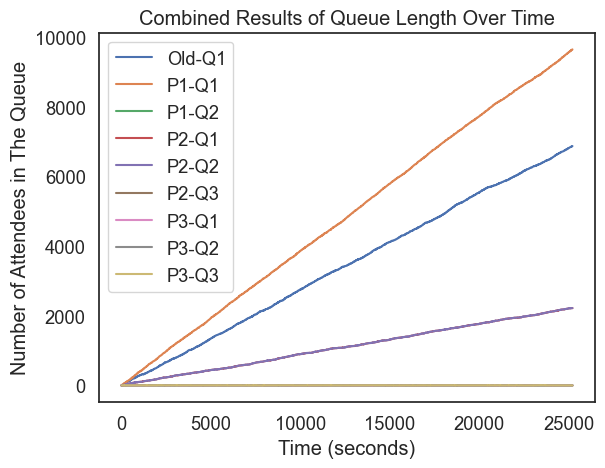

In [68]:
import matplotlib.pyplot as plt

# We have multiple dataframes like results, new_results1, new_results2, new_results3
dataframes = [results, new_results1, new_results2, new_results3]

# Create a figure and axis
fig, ax = plt.subplots()

# Add labels, legend, and title
ax.plot(results['Queue 1'], label="Old-Q1")

ax.plot(new_results1['Queue 1'], label="P1-Q1")
ax.plot(new_results1['Queue 2'], label="P1-Q2")

ax.plot(new_results2['Queue 1'], label="P2-Q1")
ax.plot(new_results2['Queue 2'], label="P2-Q2")
ax.plot(new_results2['Queue 3'], label="P2-Q3")

ax.plot(new_results3['Queue 1'], label="P3-Q1")
ax.plot(new_results3['Queue 2'], label="P3-Q2")
ax.plot(new_results3['Queue 3'], label="P3-Q3")
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Number of Attendees in The Queue')
ax.legend(loc='upper left')
ax.set_title('Combined Results of Queue Length Over Time')

# Show the plot
plt.show()


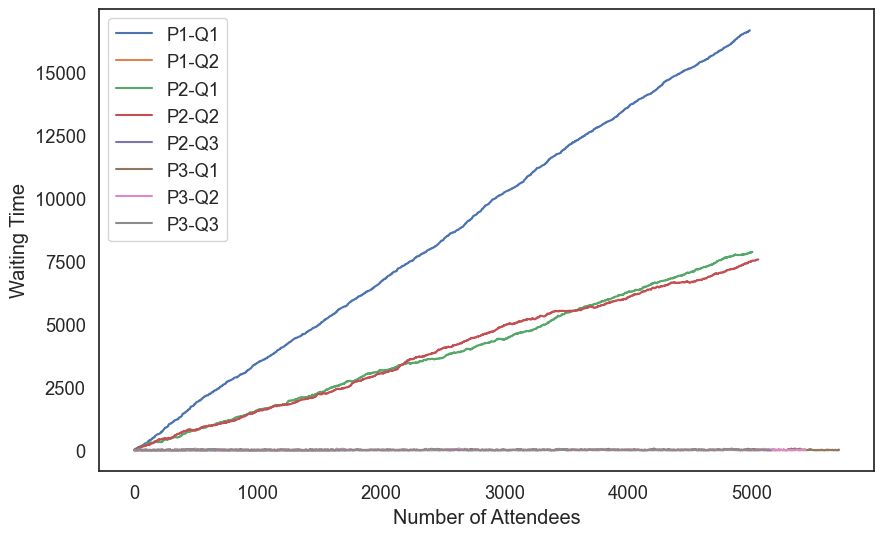

In [69]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot waiting times for x1, x2
plt.plot(new_waiting_time1_x1['Attendee Count'], new_waiting_time1_x1['Waiting Time'], label='P1-Q1')
plt.plot(new_waiting_time1_x2['Attendee Count'], new_waiting_time1_x2['Waiting Time'], label='P1-Q2')

# Plot waiting times for x1, x2, and x3
plt.plot(new_waiting_time2_x1['Attendee Count'], new_waiting_time2_x1['Waiting Time'], label='P2-Q1')
plt.plot(new_waiting_time2_x2['Attendee Count'], new_waiting_time2_x2['Waiting Time'], label='P2-Q2')
plt.plot(new_waiting_time2_x3['Attendee Count'], new_waiting_time2_x3['Waiting Time'], label='P2-Q3')

# Plot waiting times for x1, x2, and x3
plt.plot(new_waiting_time_x1['Attendee Count'], new_waiting_time_x1['Waiting Time'], label='P3-Q1')
plt.plot(new_waiting_time_x2['Attendee Count'], new_waiting_time_x2['Waiting Time'], label='P3-Q2')
plt.plot(new_waiting_time_x3['Attendee Count'], new_waiting_time_x3['Waiting Time'], label='P3-Q3')

# Add labels and a legend
plt.xlabel('Number of Attendees')
plt.ylabel('Waiting Time')
plt.legend()

# Show the plot
plt.show()

The results are also displayed together once again in text form for comparison purposes.

In [70]:
print("Existing System:")
print(compute_metrics(results, old_system))
print("")
print("Proposed System 1:")
print(compute_metrics(new_results1, new_system1))
print("")
print("Proposed System 2:")
print(compute_metrics(new_results2, new_system2))
print("")
print("Proposed System 3:")
print(compute_metrics(new_results3, new_system3))

Existing System:
(Queue 1    3453.390238
dtype: float64, Queue 1    5355.411323
dtype: float64)

Proposed System 1:
(Queue 1    4863.723611
Queue 2       0.370040
dtype: float64, Queue 1    7542.512923
Queue 2       0.573846
dtype: float64)

Proposed System 2:
(Queue 1    1115.381349
Queue 2    1115.886548
Queue 3       0.393770
dtype: float64, Queue 1    1729.699077
Queue 2    1730.482523
Queue 3       0.610646
dtype: float64)

Proposed System 3:
(Queue 1    3.384921
Queue 2    3.072024
Queue 3    2.770159
dtype: float64, Queue 1    5.249231
Queue 2    4.764000
Queue 3    4.295877
dtype: float64)


In [71]:
print("Existing System:")
print("Seconds: " + str(results_sec))
print("Minutes: " + str(results_min))
print("Hours: " + str(results_hr))
print("")
print("Proposed System 1:")
print("Seconds: " + str(new_throughput_results1_sec))
print("Minutes: " + str(new_throughput_results1_min))
print("Hours: " + str(new_throughput_results1_hr))
print("")
print("Proposed System 2:")
print("Seconds: " + str(new_throughput_results2_sec))
print("Minutes: " + str(new_throughput_results2_min))
print("Hours: " + str(new_throughput_results2_hr))
print("")
print("Proposed System 3:")
print("Seconds: " + str(new_throughput_results3_sec))
print("Minutes: " + str(new_throughput_results3_min))
print("Hours: " + str(new_throughput_results3_hr))

Existing System:
Seconds: 49998
Minutes: 833.3
Hours: 13.888333333333332

Proposed System 1:
Seconds: 80888
Minutes: 1348.1333333333334
Hours: 22.46888888888889

Proposed System 2:
Seconds: 36269
Minutes: 604.4833333333333
Hours: 10.074722222222222

Proposed System 3:
Seconds: 27470
Minutes: 457.8333333333333
Hours: 7.6305555555555555


That concludes our simulation programme for the Comic Fiesta queue structure